In [26]:
import pandas as pd

df= pd.read_csv('Titanic-Dataset.csv').fillna(0)
dataframe = pd.DataFrame(df)
print(dataframe)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [35]:
dataframe = dataframe.drop('PassengerId',axis=1)
dataframe = dataframe.drop('SibSp',axis=1)
dataframe = dataframe.drop('Parch',axis=1)
dataframe = dataframe.drop('Cabin',axis=1)
dataframe = dataframe.drop('Ticket',axis=1)
dataframe.head(10)

,Survived,Passenger Class,Name,Gender,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,1
5,0,3,"Moran, Mr. James",1,0.0,8.4583,3
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,51.8625,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,21.0750,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,11.1333,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,30.0708,2


In [56]:
dataframe = dataframe.rename(columns = {'Pclass': 'Passenger_Class',
'Sex': 'Gender'})
dataframe.head(10)

,Survived,Passenger Class,Name,Gender,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,1
5,0,3,"Moran, Mr. James",1,0.0,8.4583,3
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,51.8625,1
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,21.0750,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,11.1333,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,30.0708,2


In [57]:
from sklearn.preprocessing import LabelBinarizer

one_hot = LabelBinarizer()

dataframe['Gender'] = one_hot.fit_transform(dataframe['Gender'])

embarked_mapper = {'S':1, 'C':2, 'Q':3}
dataframe['Embarked'] = dataframe['Embarked'].replace(embarked_mapper)

dataframe

,Survived,Passenger Class,Name,Gender,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,23.4500,1
889,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000,2


In [58]:
from sklearn.model_selection import train_test_split

x = dataframe.iloc[:,[1,3]].values
y = dataframe.iloc[:,0].values

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, cohen_kappa_score

def classify_report(ytest,y_pred):
    cm = confusion_matrix(ytest,y_pred)
    cr = classification_report(ytest,y_pred)
    accuracyscore = accuracy_score(ytest,y_pred)
    errorrate = 1-accuracyscore
    cohenkappascore = cohen_kappa_score(ytest,y_pred)
    
    print ("\nClassification Report:\n")
    print("Confusion Matrix: ", cm)
    print("\nAccuracy: ", accuracyscore)
    print("\nError Rate: ",errorrate )
    print("\nKappa Score: ", cohenkappascore)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

logisticclassifier = LogisticRegression()
logisticclassifier.fit(xtrain,ytrain)

y_pred_lr = logisticclassifier.predict(xtest)

r2score = r2_score(ytest,y_pred_lr)
mae = mean_absolute_error(y_true=ytest, y_pred=y_pred_lr)
mse = mean_squared_error(y_true=ytest, y_pred=y_pred_lr)
rmse = mean_squared_error(y_true=ytest, y_pred=y_pred_lr, squared=False)

print('R2SCORE: ', r2score)
print('\nMAE: ', mae)
print('\nMSE: ', mse)
print('\nRMSE: ', rmse)

print('\n\n')
classify_report(ytest, y_pred_lr)

R2SCORE:  0.04145917776491048

MAE:  0.23220973782771537

MSE:  0.23220973782771537

RMSE:  0.48188145619821826




Classification Report:

Confusion Matrix:  [[132  25]
 [ 37  73]]

Accuracy:  0.7677902621722846

Error Rate:  0.23220973782771537

Kappa Score:  0.5127737226277373


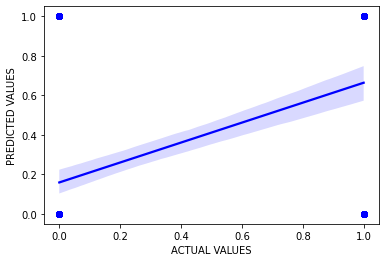

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.regplot(x=ytest,y=y_pred_lr, color='blue')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show(fig)

In [68]:
Passenger_Class = input('Passenger_Class: ')
Gender = input('Gender: ')

predict = {
    'Passenger_Class':[Passenger_Class],
    'Gender':[Gender]
}

predict_data = pd.DataFrame(predict)

from sklearn.linear_model import LogisticRegression

logisticclassifier = LogisticRegression()
logisticclassifier.fit(xtrain,ytrain)
y_pred_lr = logisticclassifier.predict(predict_data)

print('SURVIVED OR NOT: ', y_pred_lr[0])

Passenger_Class: 3
Gender: 0
SURVIVED OR NOT:  1


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
